## Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
original_df = df.copy() #copy of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
#Replacing some column names for clarity
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})
#Irrelevant columns dropped
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

## Exploring the distributions

Kernel density estimate and Histogram


Text(0.5, 1.0, 'Total commited by investors')

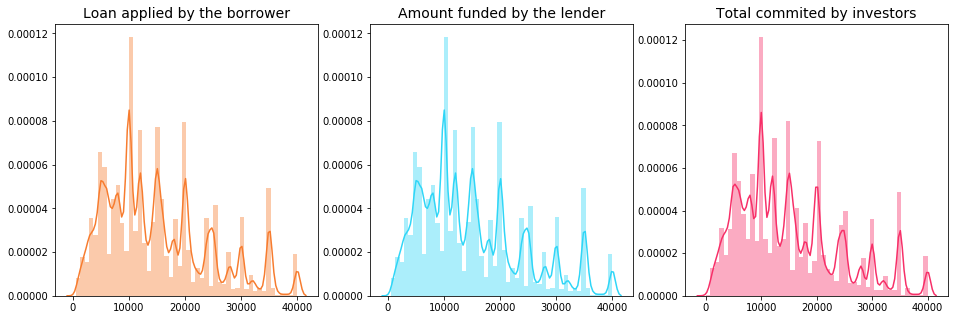

In [16]:
print("Kernel density estimate and Histogram")
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values

sns.distplot(loan_amount, ax=ax[0], color='#F77C2F')
ax[0].set_title("Loan applied by the borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color='#2FD6F7')
ax[1].set_title("Amount funded by the lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color='#F72F68')
ax[2].set_title("Total commited by investors", fontsize=14)

Most of the loans issued were in the range of **10000 to 20000** USD.

The loans **applied** by potential borrowers, the amount **issued** to the borrowers and the amount **funded** by investors are similarly distribution. Hence, it is most likely that qualified borrowers are going to get the loan they had applied for.

In [12]:
#Transforming the issue dates by year (Dec-2011 to 2011)
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

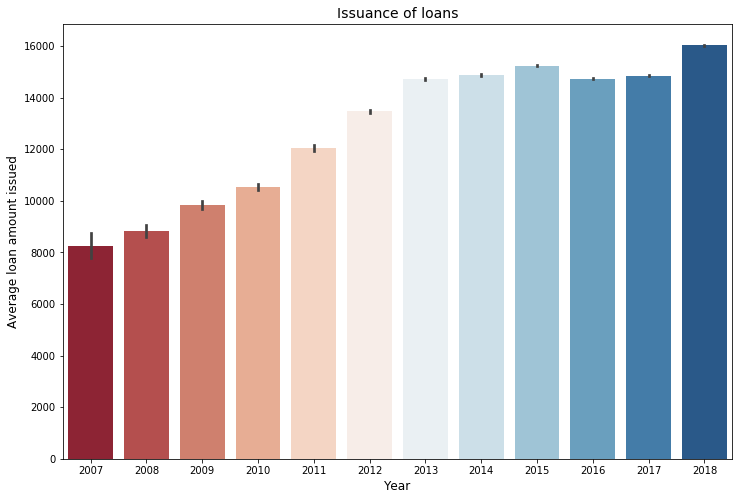

In [14]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=df, palette='RdBu')
plt.title('Issuance of loans', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average loan amount issued', fontsize=12)

Most of the loans were issued in the year **2018**

In [15]:
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [17]:
#Determining the bad loans

bad_loan = ["Charged off", 'Default', "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
           "Late (31-120 days)", "Late (16-30 days)"]

df['loan_condtion'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
df['loan_condition'] = df['loan_status'].apply(loan_condition)

Text(0, 0.5, '%')

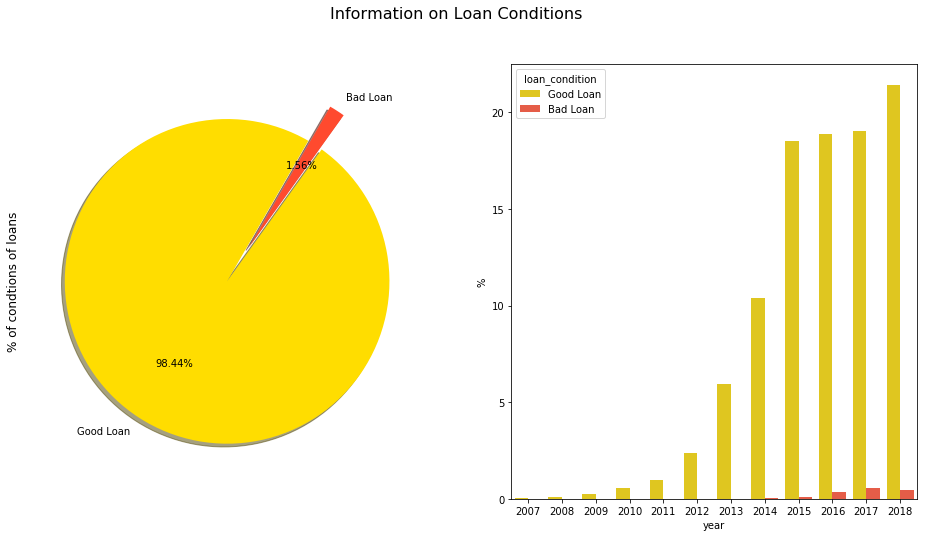

In [25]:
f,ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#FFDD00", "#FF4A2E"]
labels = ["Good Loan", "Bad Loan"]
plt.suptitle("Information on Loan Conditions", fontsize=16)
df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                            colors=colors, labels=labels, fontsize=10, startangle=60)
ax[0].set_ylabel('% of condtions of loans', fontsize=12)
sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=df, palette=colors, 
            estimator=lambda x: len(x) / len(df) * 100)
ax[1].set_ylabel('%')

**Bad loans** consist 1.56% of total loans.

Also, we still have current loans which have the risk of becoming bad loans. 

#### Analyze loans by region 

In [26]:
df['addr_state'].unique()

#Regions by state

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['region'] = np.nan
def find_regions(state):
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south west'
    elif state in 'south_east':
        return 'south east'
    elif state in mid_west:
        return 'mid west'
    elif state in north_east:
        return 'north east'

df['region']=df['addr_state'].apply(find_regions)

In [27]:
#Transforming current date into year-month format

df['complete_date'] = pd.to_datetime(df['issue_d'])
group_dates = df.groupby(['complete_date', 'region'], as_index = False).sum()
group_dates['issue_d'] = [month.to_period('M') for month in group_dates['complete_date']]
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000

df_dates = pd.DataFrame(data=group_dates[['issue_d','region', 'loan_amount']])

Text(0.5, 1.0, 'Loans issued by Region')

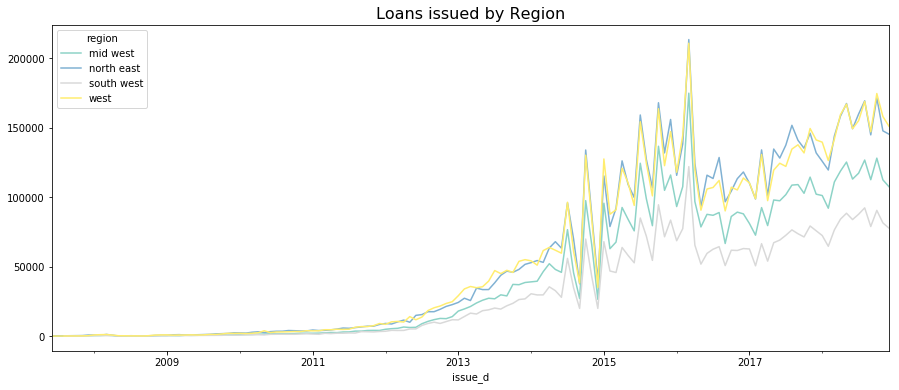

In [34]:
issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
issued_amount.unstack().plot(stacked=False, colormap=plt.cm.Set3, grid=False, legend=True, figsize=(15,6))
plt.title('Loans issued by Region', fontsize=16)

In [35]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']
#Converting emplo_length to integer values
lst = [df]
df['emp_length_int'] = np.nan
for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

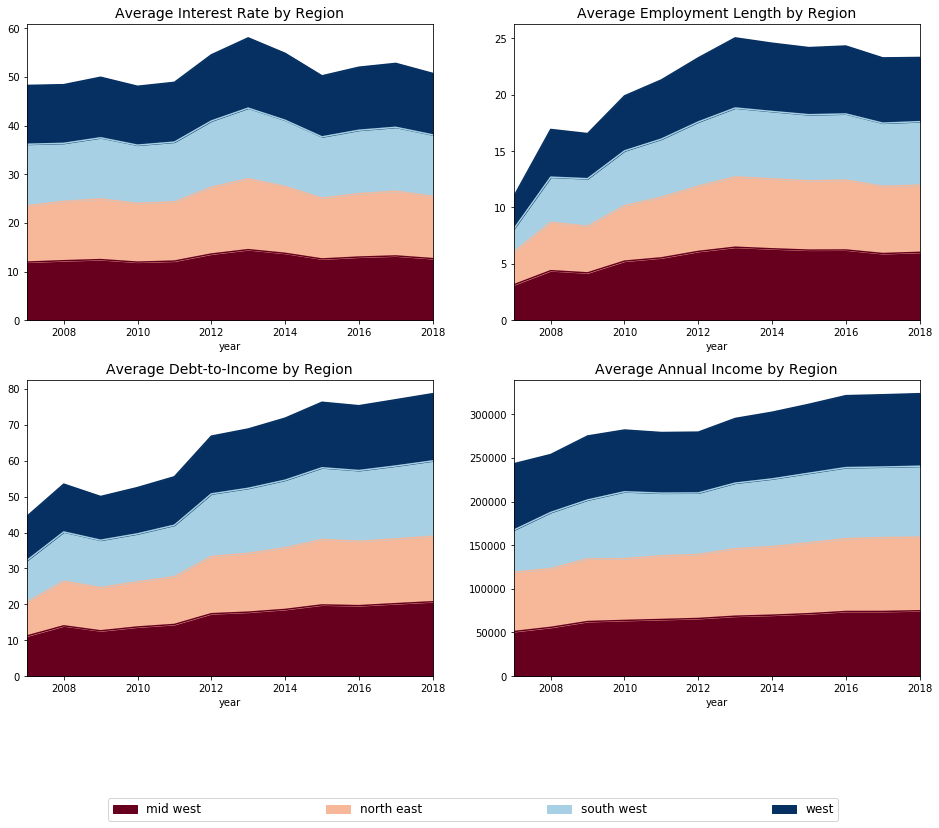

In [39]:
# Loan issued by Region and by Credit Score grade

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.RdBu

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)